In [ ]:
import matplotlib.pyplot as plt;
import numpy as np;
import pandas as pd
from numpy import mean;
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.DataFrame(np.loadtxt('train.txt', dtype=int))
df.columns=['X_data','Y_data','classNumber'];
print(df);

    X_data  Y_data  classNumber
0        2       2            1
1        3       1            1
2       -4       3            2
3        3       3            2
4       -1      -3            1
5        2       6            1
6        4       2            1
7       -2      -2            1
8        0       0            2
9       -2       2            2
10      -1      -1            2
11      -4       2            2
12       1       3            1
13       2       3            2


## train data




In [ ]:
class1_data =[[df.iloc[i]['X_data'], df.iloc[i]['Y_data']] for i,m in enumerate(df.classNumber) if m == 1 ]
class2_data =[(df.iloc[i]['X_data'], df.iloc[i]['Y_data']) for i,m in enumerate(df.classNumber) if m == 2 ]
class1_data = np.array(class1_data);
class2_data = np.array(class2_data);
print(class1_data);
print(class2_data);

[[ 2  2]
 [ 3  1]
 [-1 -3]
 [ 2  6]
 [ 4  2]
 [-2 -2]
 [ 1  3]]
[[-4  3]
 [ 3  3]
 [ 0  0]
 [-2  2]
 [-1 -1]
 [-4  2]
 [ 2  3]]


## Mean data

In [ ]:
class1_mean = np.mean(class1_data,axis = 0);
class2_mean = np.mean(class2_data,axis = 0);
print(class1_mean,class2_mean);

[1.28571429 1.28571429] [-0.85714286  1.71428571]


## Sample Data

In [ ]:
df_sample = pd.DataFrame(np.loadtxt('test.txt', dtype=int))
df_sample.columns=['X_data','Y_data','classNumber'];
total_class_data = [(df_sample.iloc[i]['X_data'], df_sample.iloc[i]['Y_data']) for i,m in enumerate(df_sample.classNumber)];
class1_test_data =[(df_sample.iloc[i]['X_data'], df_sample.iloc[i]['Y_data']) for i,m in enumerate(df_sample.classNumber) if m == 1 ]
class2_test_data =[(df_sample.iloc[i]['X_data'], df_sample.iloc[i]['Y_data']) for i,m in enumerate(df_sample.classNumber) if m == 2 ]
total_class_data = np.array(total_class_data);
class1_test_data = np.array(class1_test_data);
class2_test_data = np.array(class2_test_data);
print(total_class_data);
print(total_class_data[1,0]);
print(np.dot(total_class_data[1,:],class1_mean.transpose()))

[[-1 -5]
 [ 3  2]
 [-2  1]
 [ 8  2]
 [ 6 -1]
 [ 0  2]
 [-3  0]
 [ 3  1]]
3
6.428571428571429


## Measuring LDA function

In [ ]:
test_class = [];
for i in range(len(total_class_data)):
    g1 = (np.dot(total_class_data[i,:],total_class_data[i,:])) - (0.25 * np.dot(total_class_data[i,:], class1_mean.transpose()));
    g2  = (np.dot(total_class_data[i,:],total_class_data[i,:])) - (0.25 * np.dot(total_class_data[i,:], class1_mean.transpose()));
    print(g1,g2);
    if g1 > g2:
        test_class.append([total_class_data[i,0],total_class_data[i,1],1]);
        
    else:
        test_class.append([total_class_data[i,0],total_class_data[i,1],2]);

print(test_class);


27.928571428571427 27.928571428571427
11.392857142857142 11.392857142857142
5.321428571428571 5.321428571428571
64.78571428571429 64.78571428571429
35.392857142857146 35.392857142857146
3.357142857142857 3.357142857142857
9.964285714285715 9.964285714285715
8.714285714285714 8.714285714285714
[[-1, -5, 2], [3, 2, 2], [-2, 1, 2], [8, 2, 2], [6, -1, 2], [0, 2, 2], [-3, 0, 2], [3, 1, 2]]


## Calculating decision boundary

In [ ]:
co_efficient = [class1_mean - class2_mean];
print(co_efficient);
constant  = (-0.5 * np.dot(class1_mean , class1_mean.transpose())) + (0.5 * np.dot(class2_mean , class2_mean.transpose()));
x = list(range(-4,10));
y = [];
for i in range(len(x)):
    y.append(((co_efficient[0][0] * x[i]) + constant) /  (-co_efficient[0][1]));

print(x);
print(y);

[array([ 2.14285714, -0.42857143])]
[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[-19.57142857142858, -14.57142857142858, -9.571428571428575, -4.571428571428575, 0.42857142857142766, 5.42857142857143, 10.428571428571432, 15.428571428571434, 20.428571428571434, 25.428571428571438, 30.42857142857144, 35.428571428571445, 40.428571428571445, 45.42857142857145]


## Plotting points

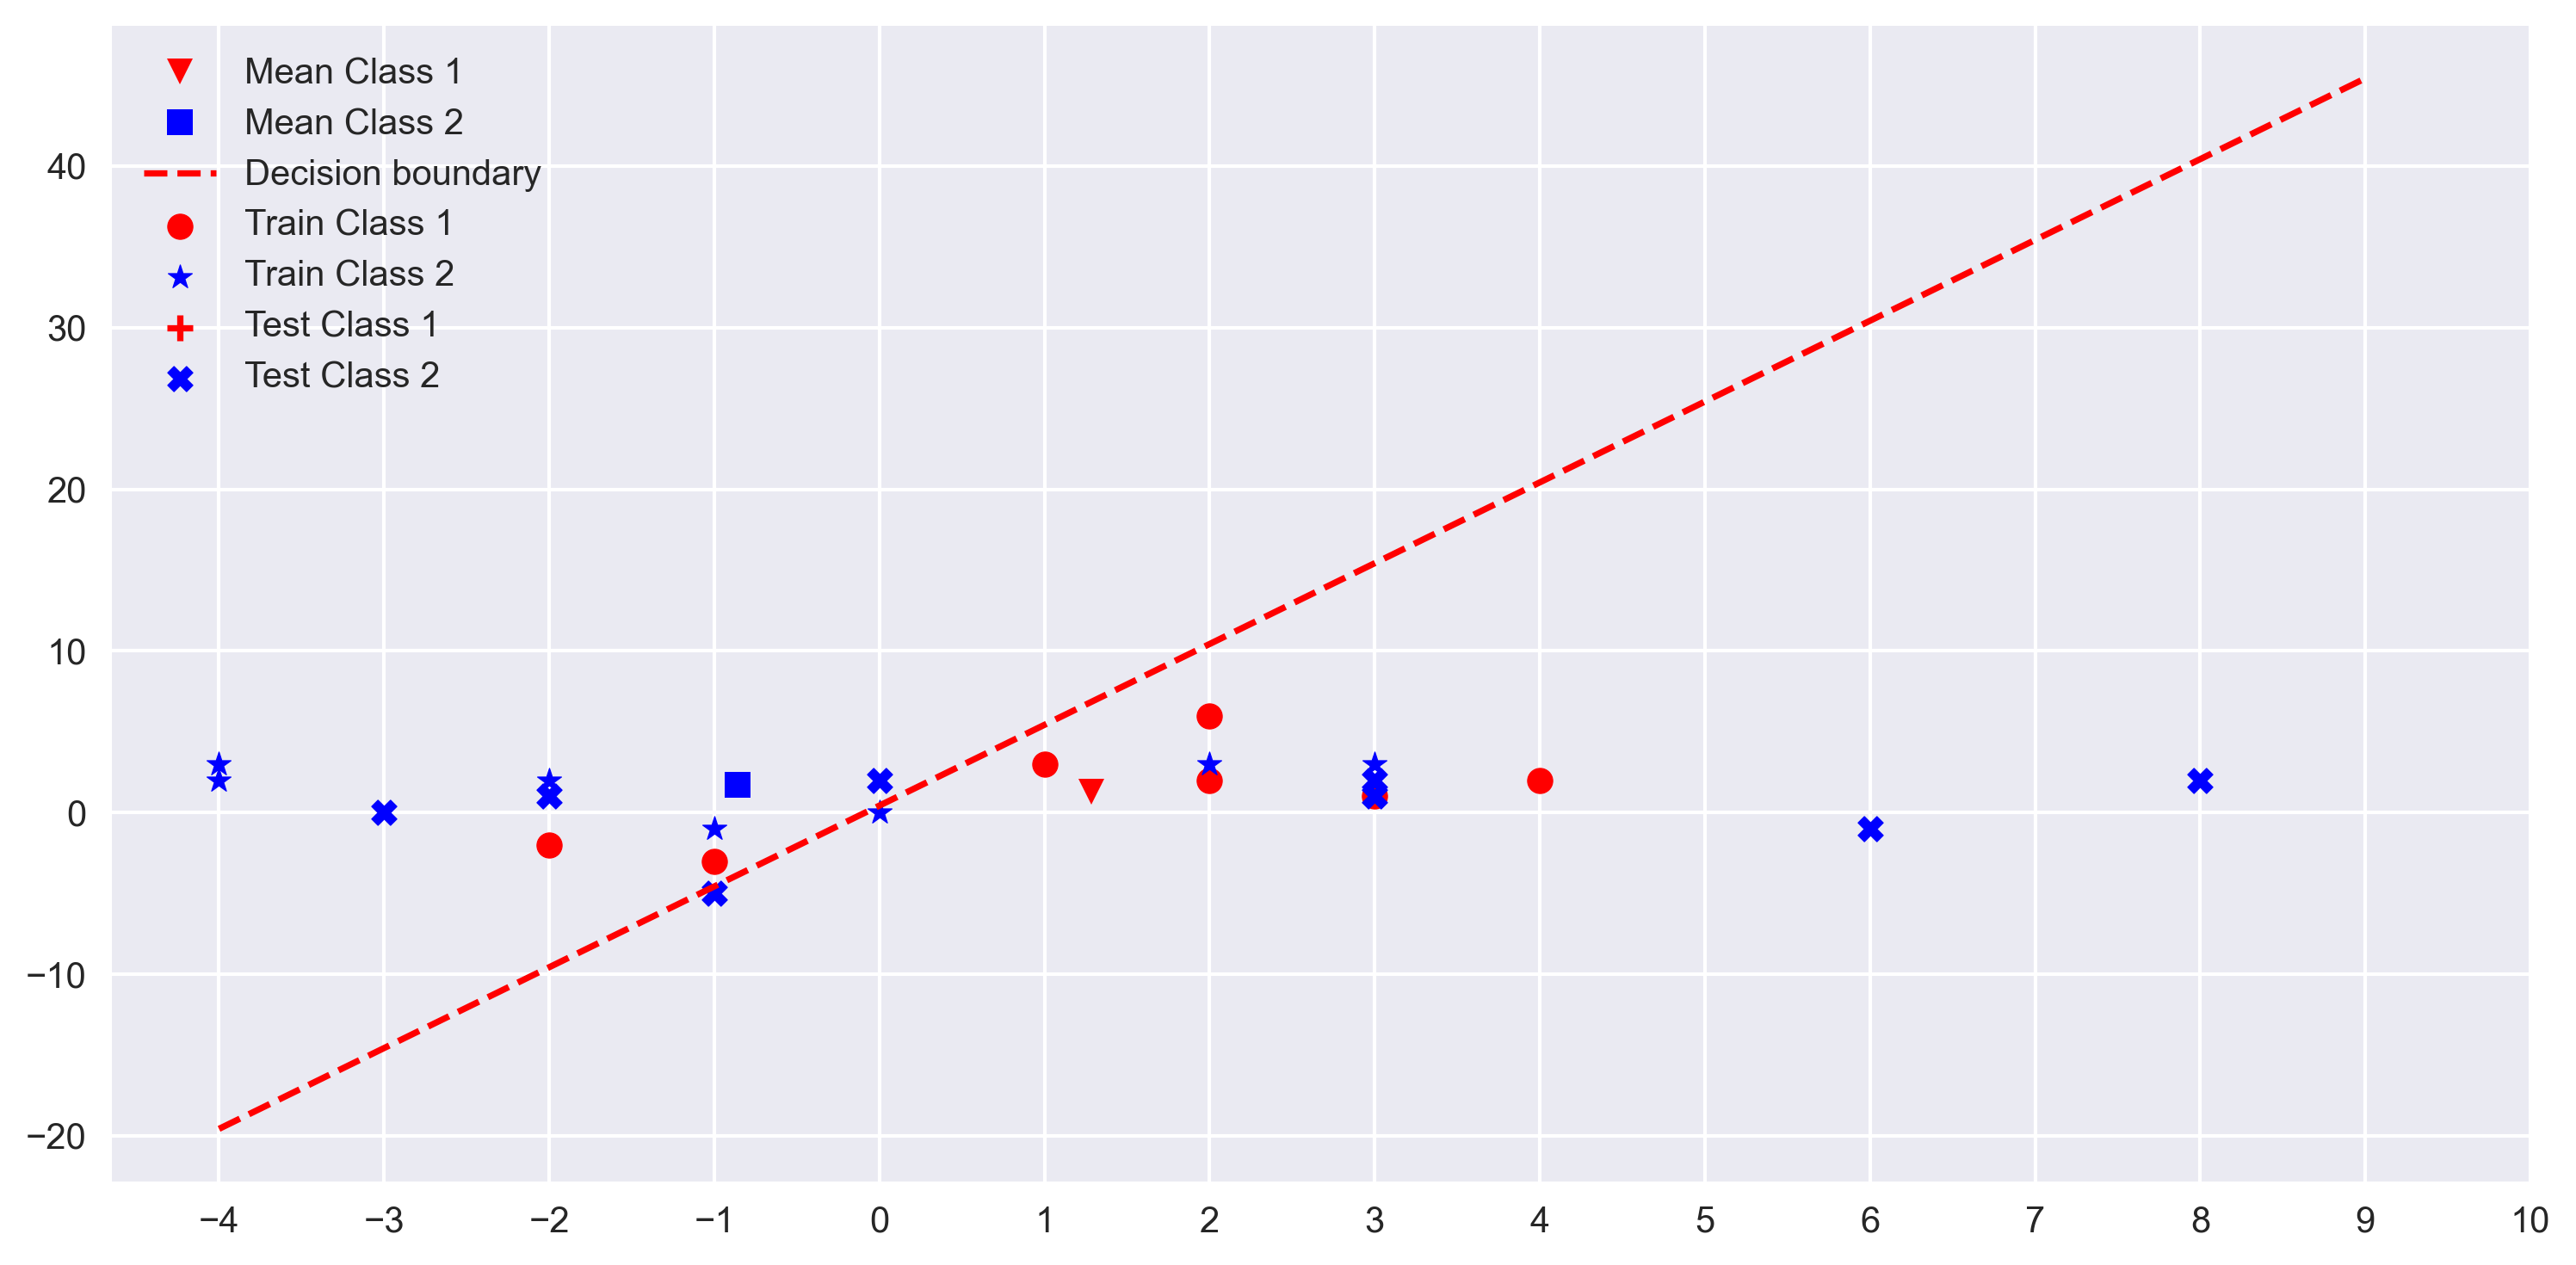

In [ ]:
train_data_group =df.groupby('classNumber');
plt.figure(figsize=(10,5),dpi=300);
plt.style.use('seaborn');

#train
for className , train_data in train_data_group:
    if className == 1:
        plt.scatter(train_data.X_data , train_data.Y_data,marker = 'o', color = 'r', label = 'Train Class 1');
    else:
        plt.scatter(train_data.X_data , train_data.Y_data,marker = '*', color = 'b', label = 'Train Class 2');
        
#test class 1
x_data =[test_class[i][0] for i in range(len(test_class)) if test_class[i][2] == 1];
y_data =[test_class[i][1] for i in range(len(test_class)) if test_class[i][2] == 1];
plt.scatter(x_data , y_data, marker='+', color = 'r', label = 'Test Class 1');

#test class 2
x_data =[test_class[i][0] for i in range(len(test_class)) if test_class[i][2] == 2];
y_data =[test_class[i][1] for i in range(len(test_class)) if test_class[i][2] == 2];
plt.scatter(x_data , y_data, marker='X', color = 'b', label = 'Test Class 2');

#Mean class      
plt.plot(class1_mean[0],class1_mean[1], marker='v', color = 'r',linestyle ='', label = 'Mean Class 1');
plt.plot(class2_mean[0],class2_mean[1], marker = 's', color = 'b',linestyle ='', label = 'Mean Class 2');

#decision boundary plot
plt.plot(x,y,color = 'r',linestyle ='--', label = 'Decision boundary');
plt.grid(True); #create a grid layout
plt.tight_layout(); #creates a perfect padding style
plt.legend();
plt.xticks(list(range(-4,11)));
plt.show();

## Accuracy

In [ ]:
y_true = df_sample['classNumber'].to_list();
y_pred = [test_class[i][2] for i in range(len(test_class))];
# print(accuracy_score(y_true, y_pred, normalize=False));
print(f'Accuracy is {accuracy_score(y_true, y_pred) * 100}%');

Accuracy is 37.5%
